In [74]:

import gurobipy as gp
import numpy as np
from gurobipy import GRB


# Decision-Making Optimization for Buying Beer: Documentation

This documentation explains the purpose and functionality of the provided Python script, which utilizes the Gurobi Python library to model a decision-making problem related to buying beer in either Denmark or Germany. The script uses Mixed Integer Linear Programming (MILP) to determine the optimal choice based on cost considerations. Below is a detailed breakdown of the script's components and logic:

## Script Purpose:
The script aims to determine whether it is more cost-effective to buy beer in Denmark or Germany, considering various factors such as prices, travel expenses, and capacity constraints. It formulates this decision as a Mixed Integer Linear Programming (MILP) problem and solves it to find the optimal solution.

## Key Constants:
The script defines several constants that represent various costs, capacities, and parameters. These constants can be modified to reflect the current values. Here are the key constants and their descriptions:

- `p_soda_dk_avg`: Average price of soda in Denmark.
- `p_beer_dk_avg`: Average price of beer in Denmark.
- `p_soda_Ger_avg`: Average price of soda in Germany.
- `p_beer_Ger_avg`: Average price of beer in Germany.
- `f_van_rent`: Cost of renting a van.
- `d_gas_price`: Gasoline price per liter.
- `KM_per_L`: Kilometers per liter (fuel efficiency).
- `KM_DK_Ger`: Distance from Denmark to Germany (round trip).
- `f_weshare`: Miscellaneous expenses for the trip.
- `d_ferry_price`: Cost of taking a ferry.
- `d_pizzas`: Cost of pizzas.
- `van_max_capacity`: Maximum capacity of the van (in kg).
- `w_24_pack`: Weight of a 24-pack of beer (in kg).
- `max_alcohol_packs`: Maximum number of alcohol packs allowed.
- `Oscar_gets_a_fine`: Fine for a specific situation.

## Key Calculations:
Before defining the optimization problem, the script calculates some key numbers:

- `Max_packs`: Maximum number of 24-packs that can fit in the van.
- `Gas_usage`: Total gas consumption for the trip.
- `Gas_cost`: Total cost of gasoline for the trip.

## Optimization Problem:
The script defines and solves an MILP problem using Gurobi. Here are the main components of the optimization problem:

1. **Model Creation**: A new Gurobi model named "mip1" is created.

2. **Decision Variables**:
   - `x_beer_dk`: Number of 24-packs of beer bought in Denmark.
   - `x_beer_Ger`: Number of 24-packs of beer bought in Germany.
   - `x_soda_dk`: Number of 24-packs of soda bought in Denmark.
   - `x_soda_Ger`: Number of 24-packs of soda bought in Germany.
   - `y_dk`: Binary variable (1 if buying in Denmark, 0 otherwise).
   - `y_Ger`: Binary variable (1 if buying in Germany, 0 otherwise).

3. **Objective Function**:
   The objective function is to minimize the total cost, considering the prices of beer, soda, travel expenses, and fines.

4. **Constraints**:
   - Capacity constraints: Limit the number of 24-packs based on van capacity.
   - Alcohol pack constraints: Limit the number of alcohol packs.
   - Country selection constraints: Ensure that only one country is chosen.
   - Buy at least 1 beer and 1 soda: Guarantee the purchase of at least one 24-pack of beer and one 24-pack of soda.
   - Exclusive beer purchase: Ensure that beer is bought in only one country.
   - Exclusive soda purchase: Ensure that soda is bought in only one country.
   - Pack range constraints: Control the number of packs within a specified range.
   - Germany beer minimum: If buying in Germany, at least 40 packs of beer must be bought.

5. **Optimization**:
   The script optimizes the MILP problem to find the optimal solution.

6. **Result Display**:
   The script displays the optimal solution, including the quantities of items to buy and the total cost.

## Note:
- The script always chooses the option with the lowest cost.
- Users can adjust the pack range if they have specific preferences on the total number of packs to buy.
- It is possible to introduce a Lagrangian term in the objective function to account for the value of time spent traveling.

## Additional Resources:
- For more information on Lagrangian methods: [Lagrangian Methods](https://en.wikipedia.org/wiki/Augmented_Lagrangian_method)
- Further learning on Integer Programming or Operations Research is recommended for a deeper understanding of these techniques.

This Script attempts to model the decision to either buy beer in Germany or in Denmark via stating it as a Mixed Integer Linear program problem.
Following are the variables which can be changed to the current values:

In [75]:
# Prices for soda and beer in DK and Germany as of summer 2023
p_soda_dk_avg = np.mean([90,90,80]) + 24 ## DKK
p_beer_dk_avg = np.mean([120,120,200]) + 24 ## DKK
p_soda_Ger_avg = np.mean([52,52,62]) ## DKK
p_beer_Ger_avg = np.mean([78,78,108]) ## DKK
print(p_soda_dk_avg, p_beer_dk_avg, p_soda_Ger_avg, p_beer_Ger_avg)
f_van_rent = 886.4 ## DKK
d_gas_price = 14.49 ##DKK/L

KM_per_L = 14 ## KM/L

KM_DK_Ger = 338 ## KM

f_weshare = 1000 ## DKK

d_ferry_price = 319 ## DKK

d_pizzas = 240 ## DKK

van_max_capacity = 1036 ##kg
w_24_pack = 9 ##kg

max_alcohol_packs = 40 ## 24 packs

Oscar_gets_a_fine = 1000 ## DKK ## Oscar forgot his passport



110.66666666666667 170.66666666666666 55.333333333333336 88.0


Now to calculate some of the key numbers:

In [76]:
Max_packs = van_max_capacity/w_24_pack 

Gas_usage = KM_DK_Ger/KM_per_L

Gas_cost = Gas_usage*d_gas_price

print("Gas cost: ", Gas_cost)
print("Max packs: ", Max_packs)
print("Gas usage: ", Gas_usage)

#But actually we only have space for like 90 packs, until we have to start putting them on the seats
Max_packs = 80  ## 24 packs

# Pack range 
pack_range = range(Max_packs, Max_packs+2)

Gas cost:  349.83
Max packs:  115.11111111111111
Gas usage:  24.142857142857142


Now to state the optimization problem


In [77]:
try:
    # Create a new model
    m = gp.Model("mip1")

    # Create variables
    x_beer_dk = m.addVar(vtype=GRB.INTEGER, name="x_beer_dk")  # 24 packs
    x_beer_Ger = m.addVar(vtype=GRB.INTEGER, name="x_beer_Ger")  # 24 packs
    x_soda_dk = m.addVar(vtype=GRB.INTEGER, name="x_soda_dk")  # 24 packs
    x_soda_Ger = m.addVar(vtype=GRB.INTEGER, name="x_soda_Ger")  # 24 packs
    y_dk = m.addVar(vtype=GRB.BINARY, name="y_dk")  # Only one country
    y_Ger = m.addVar(vtype=GRB.BINARY, name="y_Ger")  # Only one country

    # Set objective
    m.setObjective((x_beer_dk * p_beer_dk_avg + x_soda_dk * p_soda_dk_avg + y_dk * f_weshare)+
                   (x_soda_Ger * p_soda_Ger_avg + x_beer_Ger * p_beer_Ger_avg +
                    y_Ger * (d_ferry_price + d_pizzas + Gas_cost + Oscar_gets_a_fine)), GRB.MINIMIZE)

    # Add constraint: maximum packs due to van capacity
    m.addConstr(x_beer_Ger + x_soda_Ger <= Max_packs, "c0")

    # Add constraint: maximum packs of alcohol
    m.addConstr(x_beer_Ger <= max_alcohol_packs, "c1")

    # Add constraint: only one country
    m.addConstr(y_dk + y_Ger <= 1, "c2")

    # Add constraint: Buy at least 1 beer 24 pack and 1 soda 24 pack
    m.addConstr(x_beer_Ger + x_beer_dk >= 1, "c3")

    # Add constraint: Buy at least 1 beer 24 pack and 1 soda 24 pack
    m.addConstr(x_soda_Ger + x_soda_Ger >= 1, "c4")

    # Add constraint: Can only buy beer at either DK or Ger
    m.addConstr(x_beer_Ger <= y_Ger*max_alcohol_packs, "c5")

    # Add constraint: Can only buy beer at either DK or Ger
    m.addConstr(x_soda_Ger <= y_Ger*Max_packs, "c6")

    # Add constraint: Can only buy beer at either DK or Ger
    m.addConstr(x_soda_dk + x_beer_dk <= y_dk*Max_packs, "c7")

    # Add constraint: Packs needs to be within range
    m.addConstr(x_beer_dk + x_soda_dk + x_beer_Ger + x_soda_Ger<= pack_range[1], "c8")
    m.addConstr(x_beer_dk + x_soda_dk + x_beer_Ger + x_soda_Ger >= pack_range[0], "c9")

    # Add constraint: No maatter what if we buy beer in Germany then 40 packs needs to be bought
    m.addConstr(x_beer_Ger >= y_Ger*max_alcohol_packs, "c10")
    
    # Optimize model
    m.optimize()

    for v in m.getVars():
        print('%s %g' % (v.VarName, v.X))

    print('Obj: %g' % m.ObjVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 4700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 11 rows, 6 columns and 25 nonzeros
Model fingerprint: 0x32509345
Variable types: 0 continuous, 6 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [6e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 11 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 7642.16 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.642163333333e+03, best bound 7.642163333333e+03, gap 0.0000%
x_beer_dk 0
x_beer_Ger 40
x_soda_dk 0
x_soda_Ger 40
y_dk 0
y_Ger 1
Obj: 7642.16


Above is seen the optimal solution. Do note that this will always choose the minimal cost option. Meaning if you have any strong opinions on how many cases in totatl should be bought then set the range accordingly.

However do note that it chooses the option with the lowest cost and thus it shows that germany is the cheaper option here.


If you wish to take into account that it is troublesome to go to Germany you can add an Lagrangian term in the objective function that penalizes with whatever you decide your time is worth. 
For an example you could set 3 guys time for a day to be worth 2000 dkk. If so then you could make a term y_ger*2000 dkk. For more info on Lagrangian go to: https://en.wikipedia.org/wiki/Augmented_Lagrangian_method or take the Integer Programming Course or Operations Research course

### Plotting the solutions 


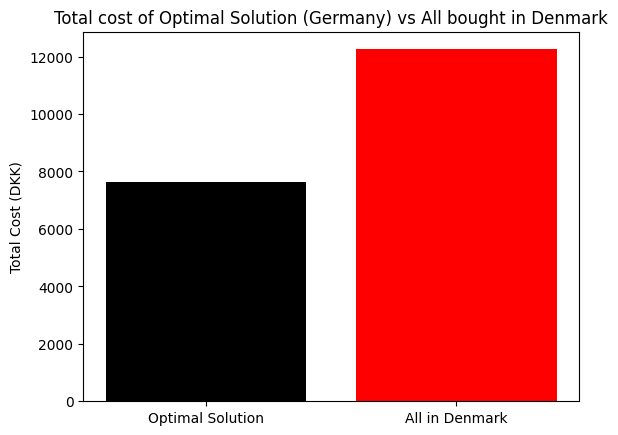

In [78]:
# Plot the solution
import matplotlib.pyplot as plt;

# Extract solution information

x_beer_Ger_value = x_beer_Ger.X
x_soda_Ger_value = x_soda_Ger.X
x_soda_dk_value = Max_packs-x_beer_dk_value
x_beer_dk_value = max_alcohol_packs

# Calculate total cost for the optimal solution
optimal_cost = m.ObjVal;

# Calculate total cost for the solution where all items are bought in Denmark
all_dk_cost = (x_beer_dk_value * p_beer_dk_avg + x_soda_dk_value * p_soda_dk_avg + f_weshare);

# Create a bar plot to compare the costs
categories = ['Optimal Solution', 'All in Denmark']
costs = [optimal_cost, all_dk_cost]

plt.bar(categories, costs, color=['black', 'red'])
plt.ylabel('Total Cost (DKK)')
plt.title('Total cost of Optimal Solution (Germany) vs All bought in Denmark')
plt.show();


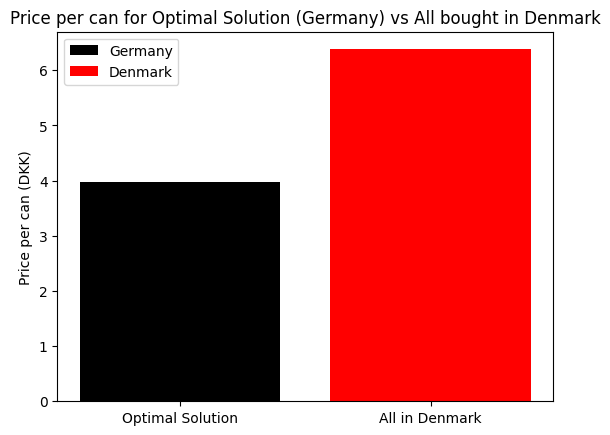

In [79]:
# Calculate price per can for optimal solution
price_per_can_optimal = optimal_cost / (x_beer_Ger_value*24 + x_soda_Ger_value*24)

# Calculate price per can for all bought in Denmark
price_per_can_denmark = all_dk_cost / (x_soda_dk_value*24 + x_beer_dk_value*24)

# Create a bar plot to compare the price per can
categories = ['Optimal Solution', 'All in Denmark']
prices_per_can = [price_per_can_optimal, price_per_can_denmark]

# Create bars for Germany and Denmark
bars = plt.bar(categories, prices_per_can, color=['black', 'red'])

# Add a legend for Germany and Denmark
plt.legend(bars, ['Germany', 'Denmark'], loc='upper left')

plt.ylabel('Price per can (DKK)')
plt.title('Price per can for Optimal Solution (Germany) vs All bought in Denmark')
plt.show()